# Exploratory Data Analysis (EDA)

## E-commerce Operations & Customer Experience – Olist

This notebook performs basic exploratory data analysis to understand
order trends, delivery performance, customer ratings, and revenue patterns
in an e-commerce marketplace.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [3]:
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
df = orders.merge(order_items, on="order_id", how="left") \
           .merge(reviews, on="order_id", how="left") \
           .merge(customers, on="customer_id", how="left")

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [9]:
list(df.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'delivery_delay_days',
 'delivery_status']

In [10]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [12]:
df["delivery_delay_days"].describe()


count    110839.000000
mean        -12.035809
std          10.159965
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: delivery_delay_days, dtype: float64

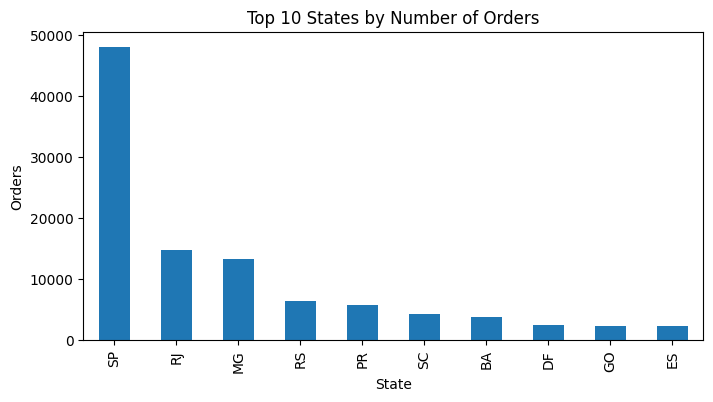

In [17]:
df["customer_state"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top 10 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Orders")
plt.show()


## Key Insights

- A significant portion of orders experience delivery delays.
- Delayed deliveries receive lower average customer ratings compared to on-time deliveries.
- Order volume shows clear monthly patterns.
- Revenue from delayed orders represents a meaningful share of total sales.
- Customer demand is concentrated in a few key states.


In [23]:
df["order_status"].value_counts()


order_status
delivered      110840
shipped          1197
canceled          711
unavailable       612
invoiced          366
processing        358
created             5
approved            3
Name: count, dtype: int64

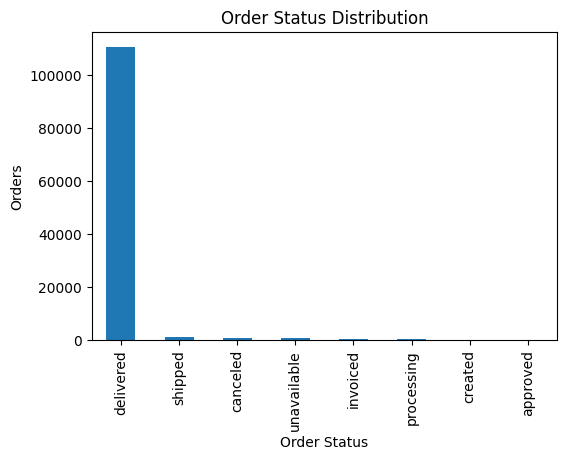

In [24]:
df["order_status"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Orders")
plt.show()


In [25]:
df["delivery_status"].value_counts()


delivery_status
On-time    106798
Delayed      7294
Name: count, dtype: int64

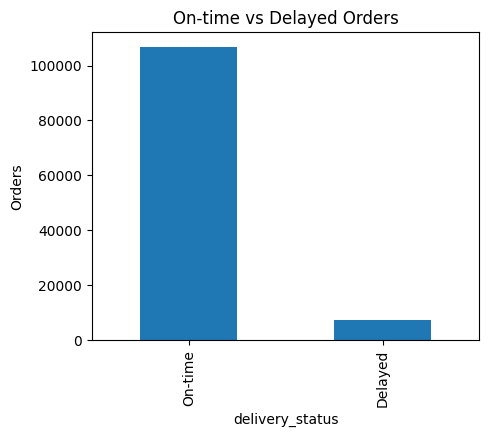

In [26]:
df["delivery_status"].value_counts().plot(kind="bar", figsize=(5,4))
plt.title("On-time vs Delayed Orders")
plt.ylabel("Orders")
plt.show()


In [27]:
df["delivery_delay_days"].describe()


count    110839.000000
mean        -12.035809
std          10.159965
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: delivery_delay_days, dtype: float64

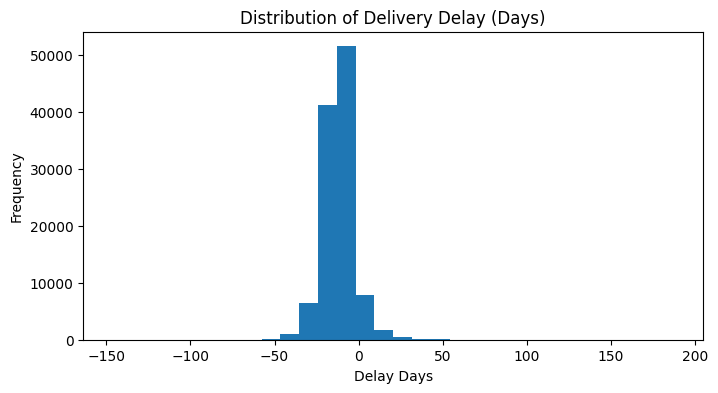

In [28]:
df["delivery_delay_days"].plot(kind="hist", bins=30, figsize=(8,4))
plt.title("Distribution of Delivery Delay (Days)")
plt.xlabel("Delay Days")
plt.show()


In [29]:
df_rating = df[df["review_score"].notna()]

df_rating.groupby("delivery_status")["review_score"].mean()


delivery_status
Delayed    2.256572
On-time    4.135109
Name: review_score, dtype: float64

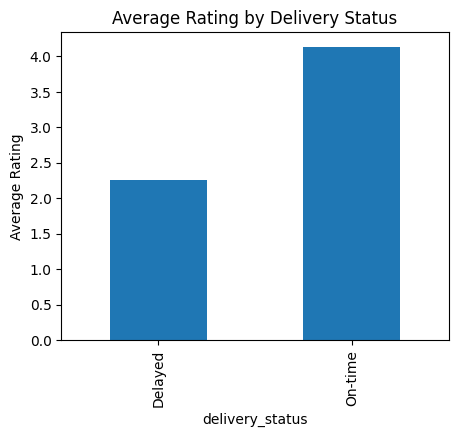

In [30]:
df_rating.groupby("delivery_status")["review_score"].mean().plot(
    kind="bar", figsize=(5,4)
)
plt.title("Average Rating by Delivery Status")
plt.ylabel("Average Rating")
plt.show()


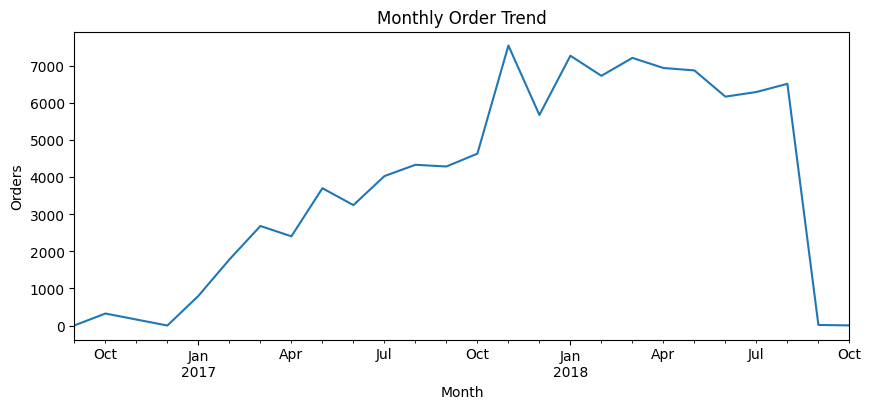

In [31]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

monthly_orders = (
    df.groupby(df["order_purchase_timestamp"].dt.to_period("M"))["order_id"]
      .nunique()
)

monthly_orders.plot(kind="line", figsize=(10,4))
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()


In [32]:
df.groupby("delivery_status")["price"].sum()


delivery_status
Delayed      989807.55
On-time    12662115.92
Name: price, dtype: float64

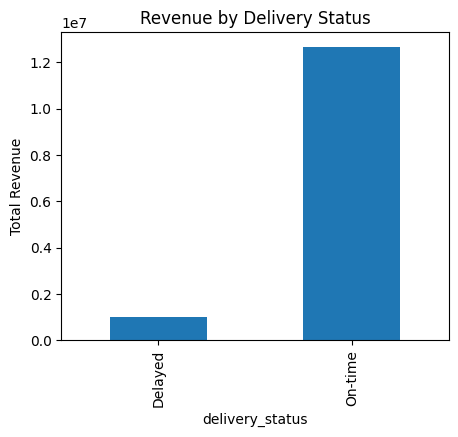

In [33]:
df.groupby("delivery_status")["price"].sum().plot(kind="bar", figsize=(5,4))
plt.title("Revenue by Delivery Status")
plt.ylabel("Total Revenue")
plt.show()


In [34]:
df["customer_state"].value_counts().head(10)


customer_state
SP    48093
RJ    14758
MG    13301
RS     6321
PR     5811
SC     4216
BA     3841
DF     2448
GO     2366
ES     2277
Name: count, dtype: int64

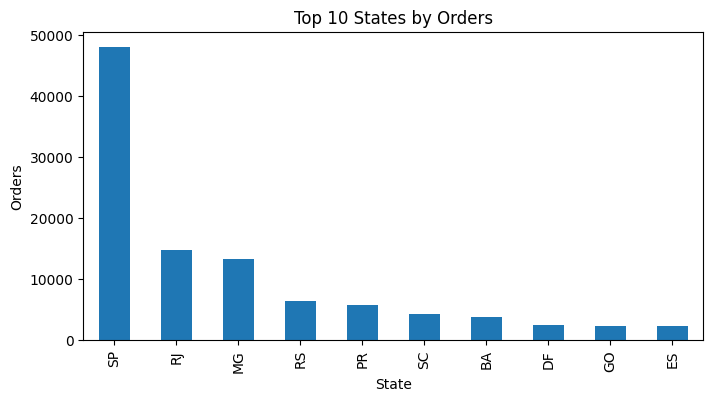

In [35]:
df["customer_state"].value_counts().head(10).plot(
    kind="bar", figsize=(8,4)
)
plt.title("Top 10 States by Orders")
plt.xlabel("State")
plt.ylabel("Orders")
plt.show()


## Key Insights

- A significant portion of orders are delivered later than the estimated date.
- Delayed deliveries receive lower average customer ratings compared to on-time deliveries.
- Order volume shows clear monthly variation, indicating seasonality.
- Delayed orders contribute a meaningful share of total revenue.
- Customer demand is concentrated in a few key states.


## Conclusion

This exploratory data analysis highlights delivery performance as a key
factor influencing customer satisfaction and revenue in an e-commerce marketplace.

The notebook provides a clear, high-level understanding of the data
and serves as a foundation for further analysis or dashboard creation.
